# 1- Tuning

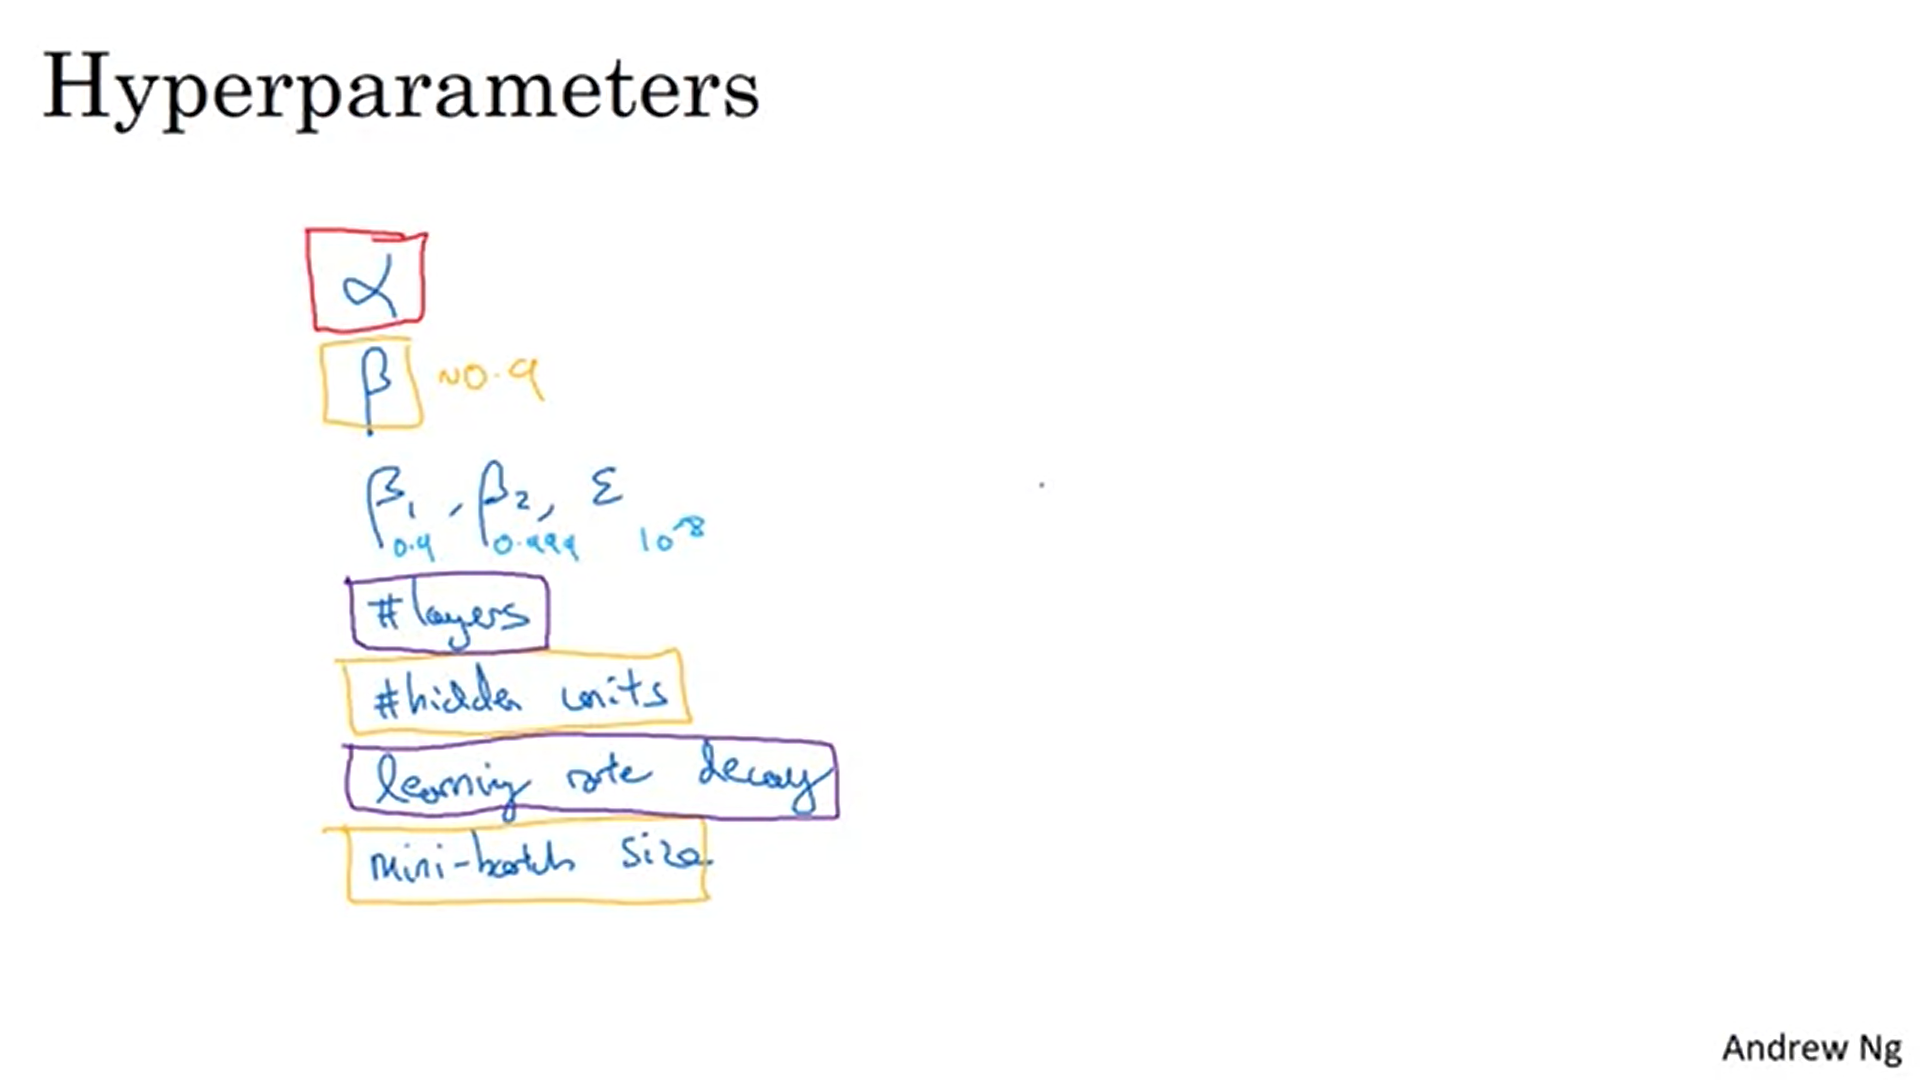

So your choice of alpha matters a lot and your choice of epsilon hardly matters. So if you sample in the grid then you've really tried out five values of alpha and you might find that all of the different values of epsilon give you essentially the same answer. So you've now trained 25 models and only got into trial five values for the learning rate alpha, which I think is really important. Whereas in contrast, if you were to sample at random, then you will have tried out 25 distinct values of the learning rate alpha and therefore you be more likely to find a value that works really well. I've explained this example, using just two hyperparameters. In practice, you might be searching over many more hyperparameters than these, so if you have, say, three hyperparameters, I guess instead of searching over a square, you're searching over a cube where this third dimension is hyperparameter three and then by sampling within this three-dimensional cube you get to try out a lot more values of each of your three hyperparameters. And in practice you might be searching over even more hyperparameters than three and sometimes it's just hard to know in advance which ones turn out to be the really important hyperparameters for your application and sampling at random rather than in the grid shows that you are more richly exploring set of possible values for the most important hyperparameters, whatever they turn out to be.

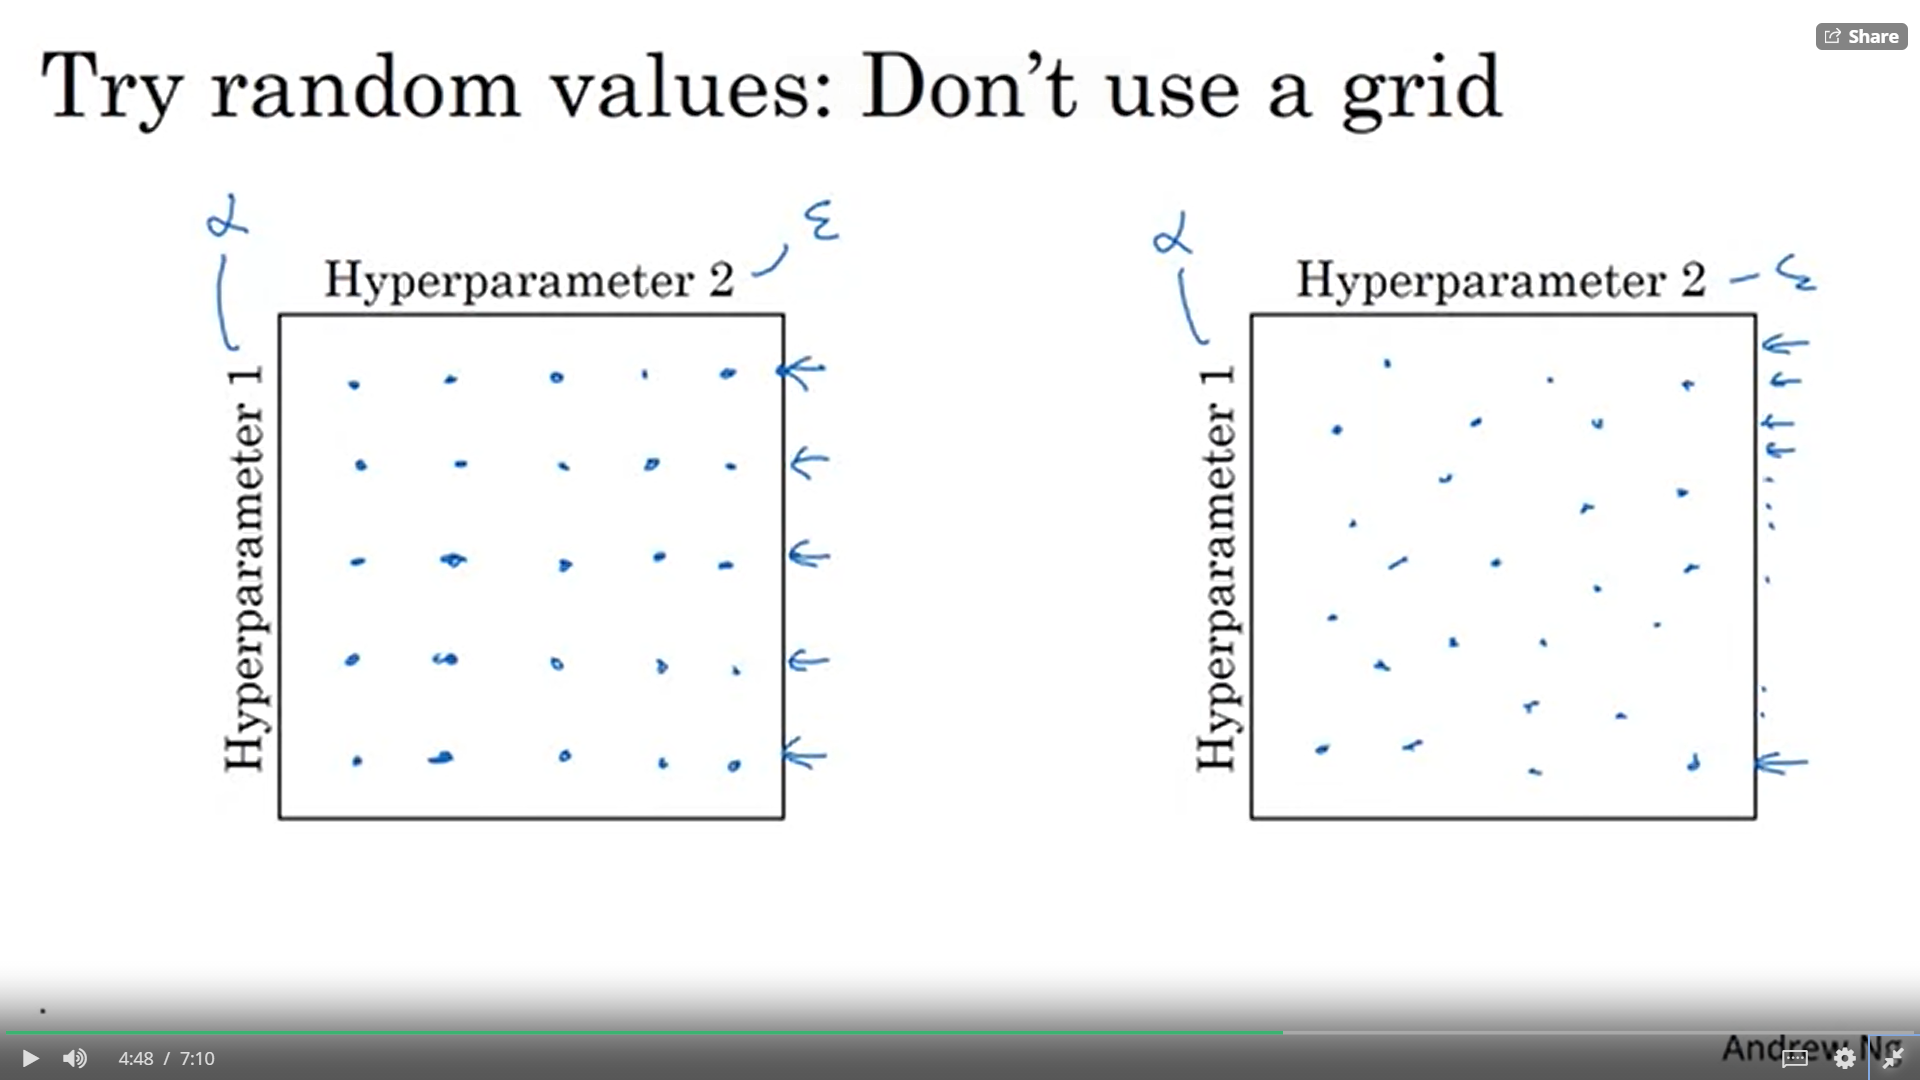

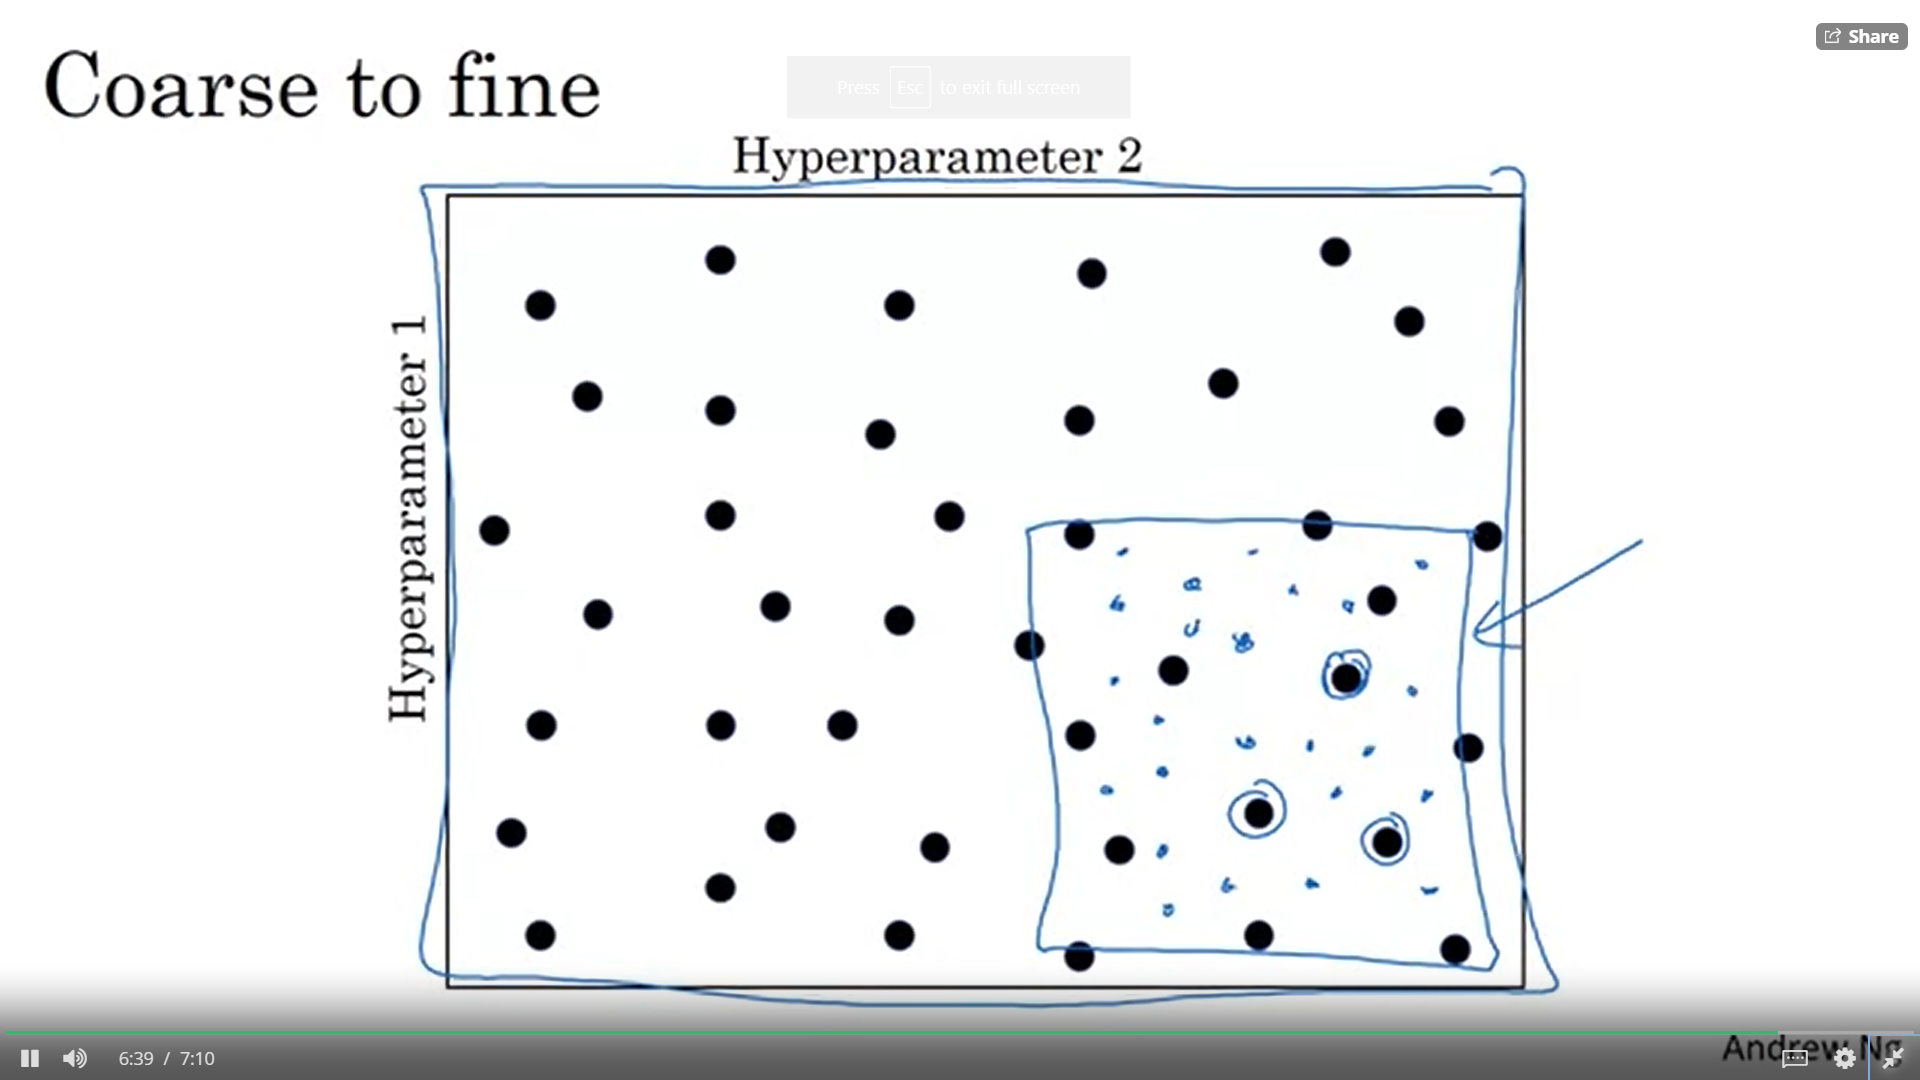

So let's say in this two-dimensional example that you sample these points, and maybe you found that this point work the best and maybe a few other points around it tended to work really well, then in the course of the final scheme what you might do is zoom in to a smaller region of the hyperparameters and then sample more density within this space. Or maybe again at random, but to then focus more resources on searching within this blue square if you're suspecting that the best setting, the hyperparameters, may be in this region

# 2- Using an appropriate scale to pick hyperparameters

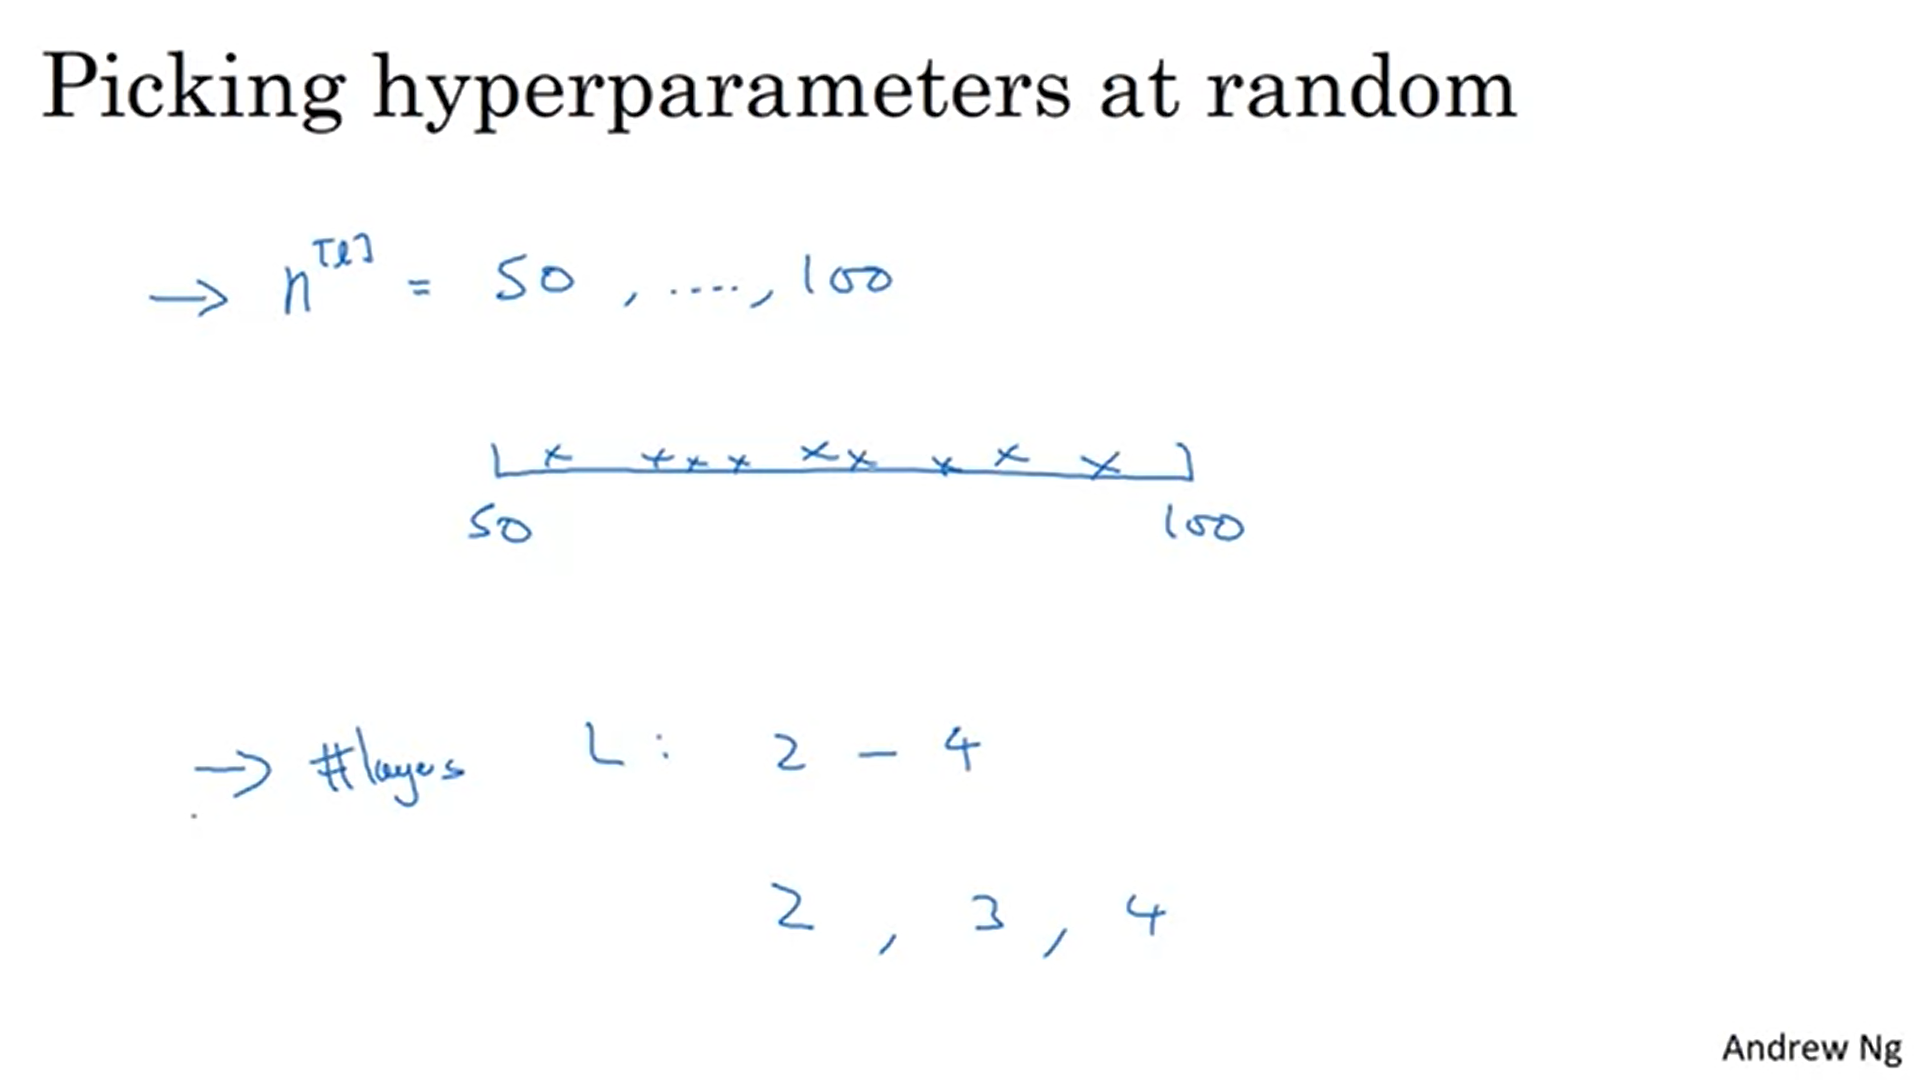

 Let's say that you're trying to choose the number of hidden units, n[l], for a given layer l. And let's say that you think a good range of values is somewhere from 50 to 100. In that case, if you look at the number line from 50 to 100, maybe picking some number values at random within this number line. There's a pretty visible way to search for this particular hyperparameter. Or if you're trying to decide on the number of layers in your neural network, we're calling that capital L. Maybe you think the total number of layers should be somewhere between 2 to 4. Then sampling uniformly at random, along 2, 3 and 4, might be reasonable. Or even using a grid search, where you explicitly evaluate the values 2, 3 and 4 might be reasonable. So these were a couple examples where sampling uniformly at random over the range you're contemplating, might be a reasonable thing to do.

But this is not true for all hyperparameters.

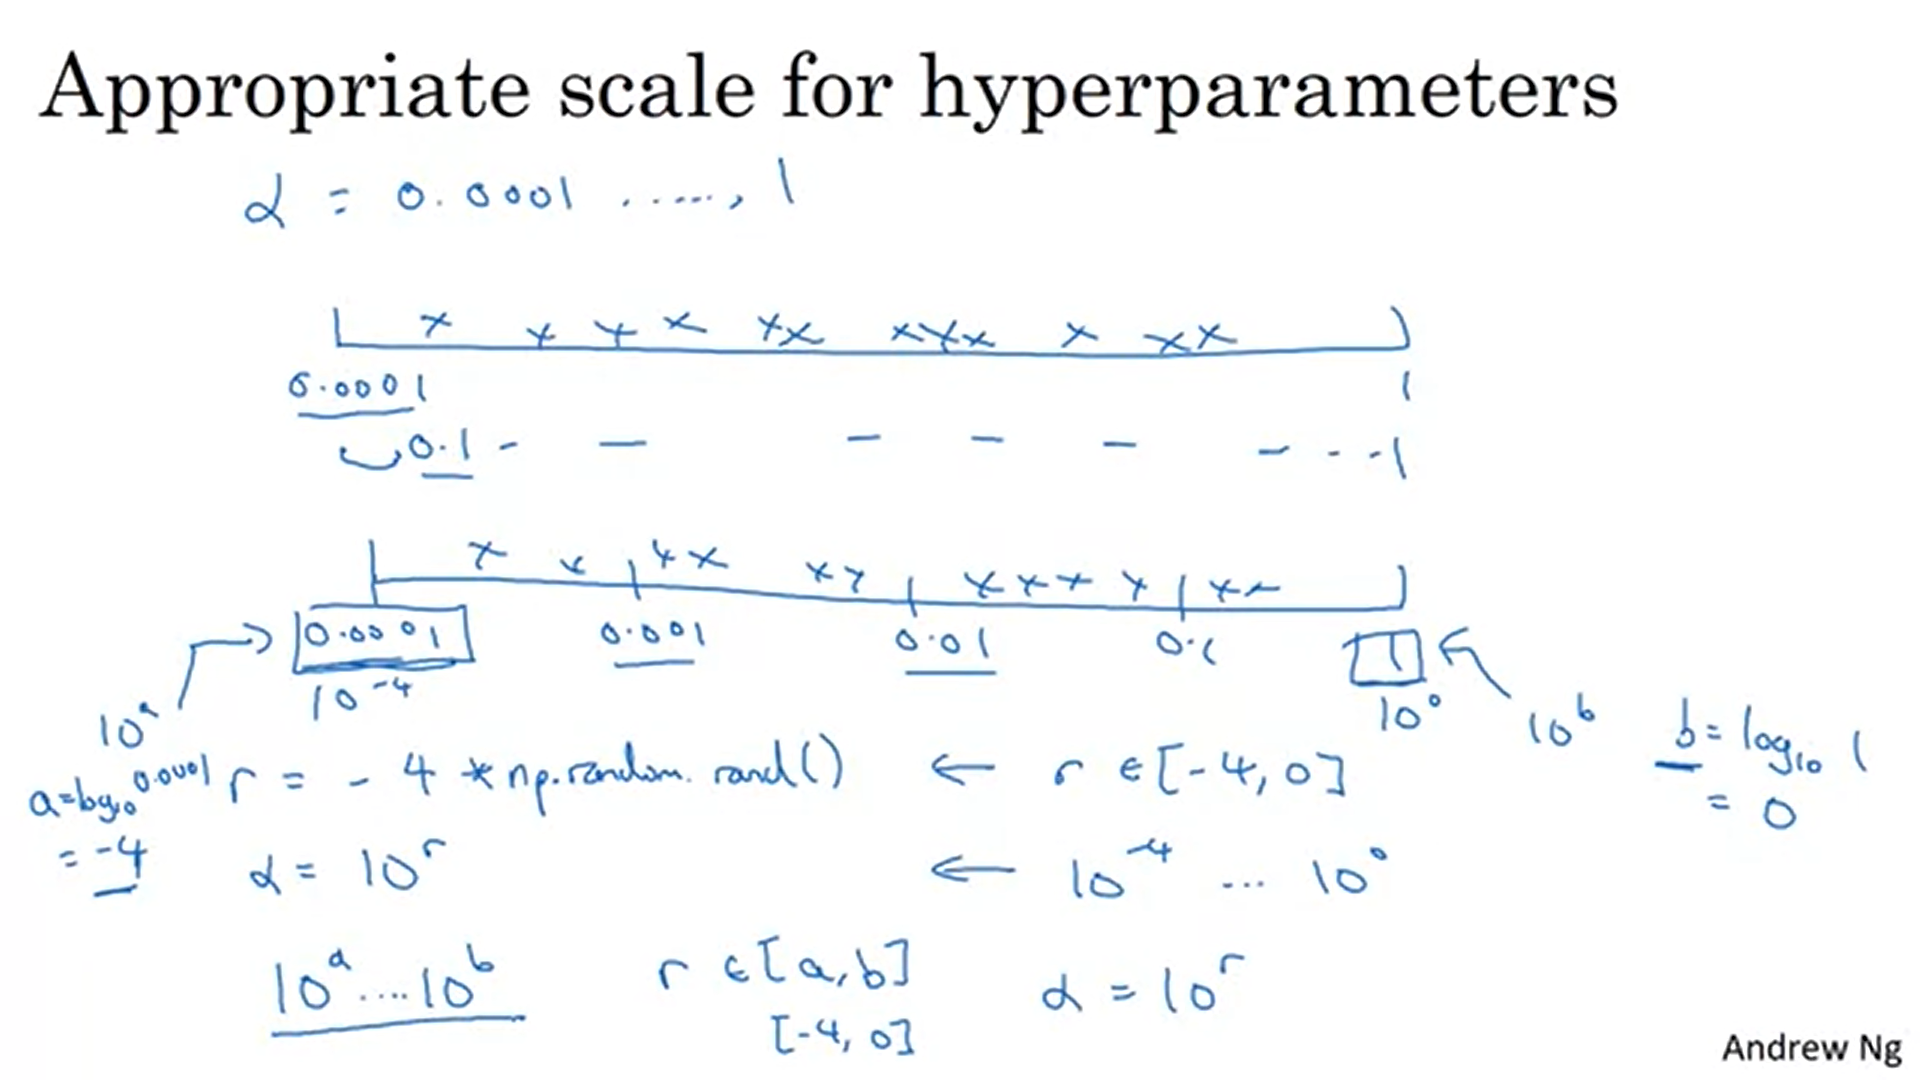

 Let's look at another example. Say your searching for the hyperparameter alpha, the learning rate. And let's say that you suspect 0.0001 might be on the low end, or maybe it could be as high as 1. Now if you draw the number line from 0.0001 to 1, and sample values uniformly at random over this number line. Well about 90% of the values you sample would be between 0.1 and 1. So you're using 90% of the resources to search between 0.1 and 1, and only 10% of the resources to search between 0.0001 and 0.1. So that doesn't seem right. Instead, `it seems more reasonable to search for hyperparameters on a log scale.` 

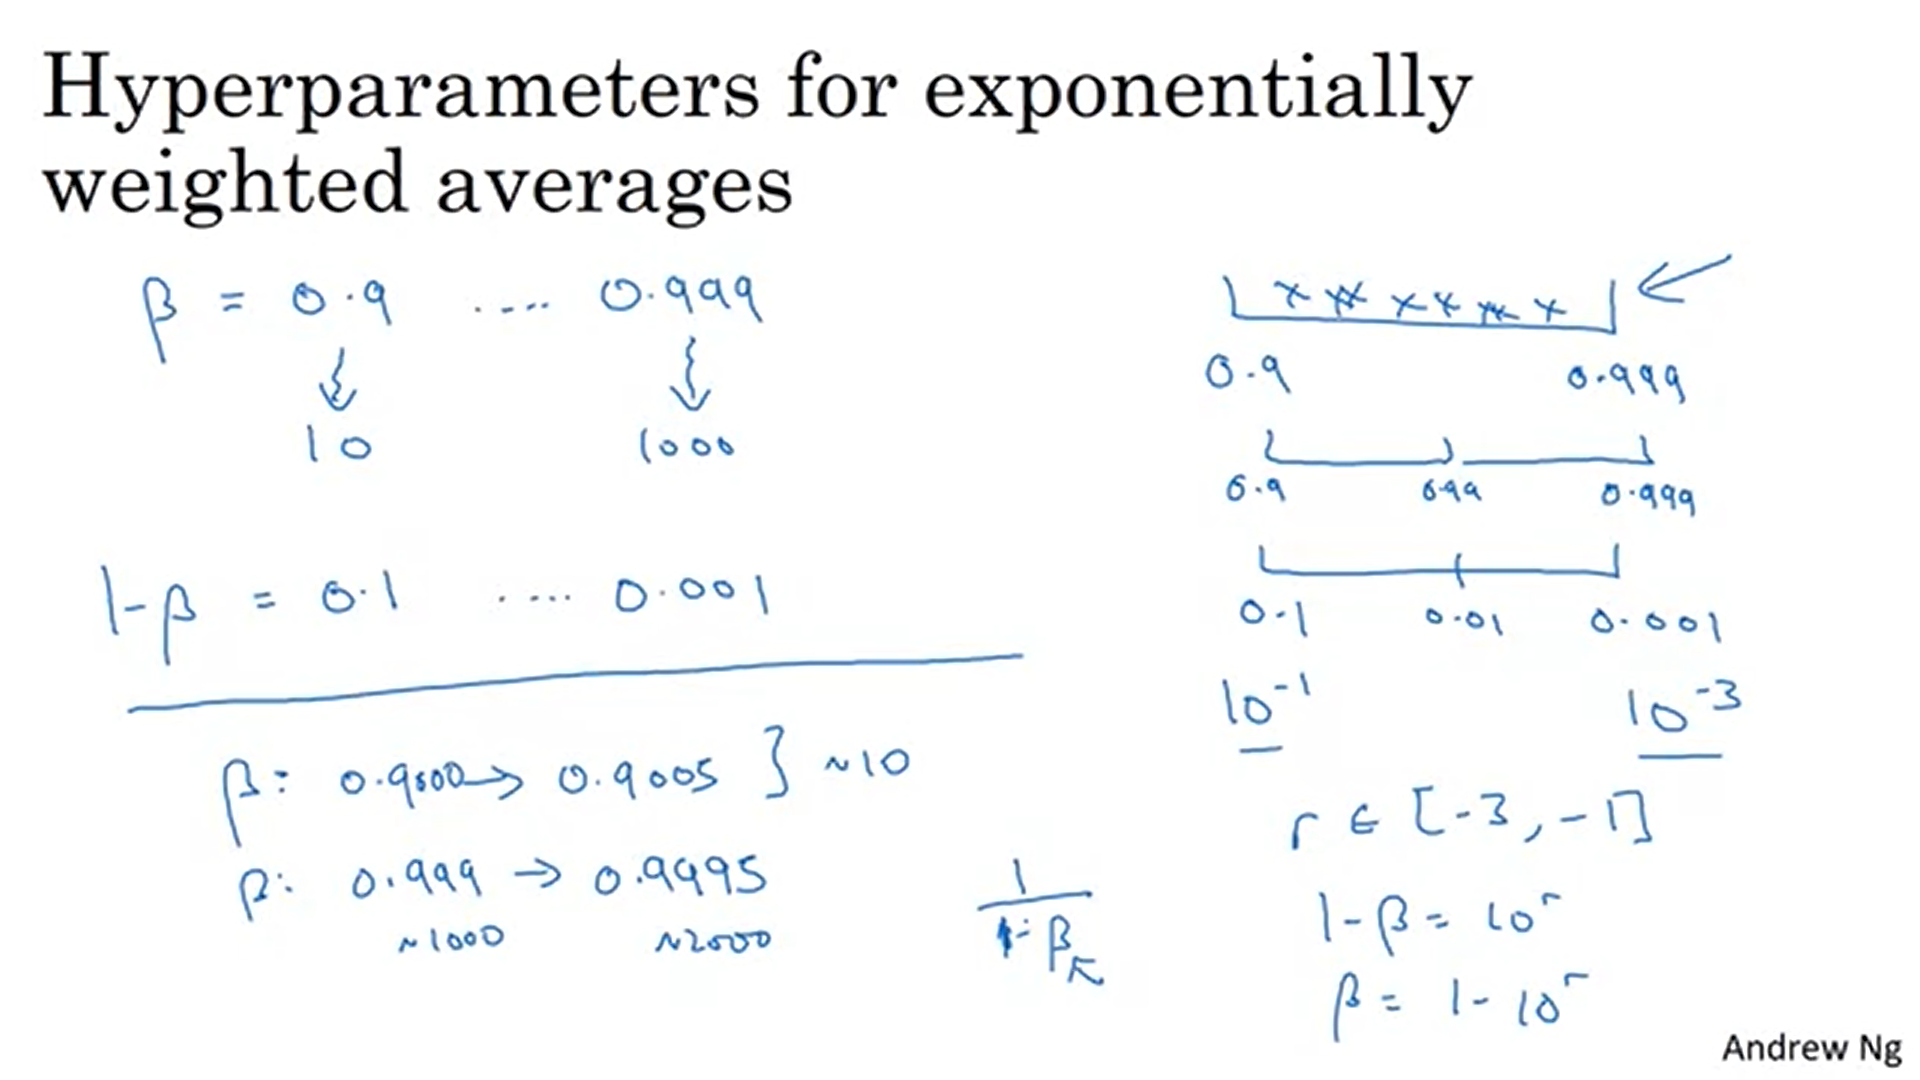

So if you want to study more formal mathematical justification for why we're doing this, right, why is it such a bad idea to sample in a linear scale? It is that, when beta is close to 1, the sensitivity of the results you get changes, even with very small changes to beta. So if beta goes from 0.9 to 0.9005, it's no big deal, this is hardly any change in your results. But if beta goes from 0.999 to 0.9995, this will have a huge impact on exactly what your algorithm is doing, right? In both of these cases, it's averaging over roughly 10 values. But here it's gone from an exponentially weighted average over about the last 1,000 examples, to now, the last 2,000 examples. And it's because that formula we have, 1 / 1- beta, this is very sensitive to small changes in beta, when beta is close to 1. So what this whole sampling process does, is it causes you to sample more densely in the region of when beta is close to 1.Or, alternatively, when 1- beta is close to 0. So that you can be more efficient in terms of how you distribute the samples, to explore the space of possible outcomes more efficiently. So I hope this helps you select the right scale on which to sample the hyperparameters.

# 3-Hyperparameters tuning in practice: Pandas vs. Caviar

##### Babysitting one model
So, for example, on Day 0 you might initialize your parameter as random and then start training. And you gradually watch your learning curve, maybe the cost function J or your dataset error or something else, gradually decrease over the first day. Then at the end of day one, you might say, gee, looks it's learning quite well, I'm going to try increasing the learning rate a little bit and see how it does. And then maybe it does better. And then that's your Day 2 performance. And after two days you say, okay, it's still doing quite well. Maybe I'll fill the momentum term a bit or decrease the learning variable a bit now, and then you're now into Day 3. And every day you kind of look at it and try nudging up and down your parameters. And maybe on one day you found your learning rate was too big. So you might go back to the previous day's model, and so on. But you're kind of babysitting the model one day at a time even as it's training over a course of many days or over the course of several different weeks. So that's one approach, and people that babysit one model, that is watching performance and patiently nudging the learning rate up or down. But that's usually what happens if you don't have enough computational capacity to train a lot of models at the same time.

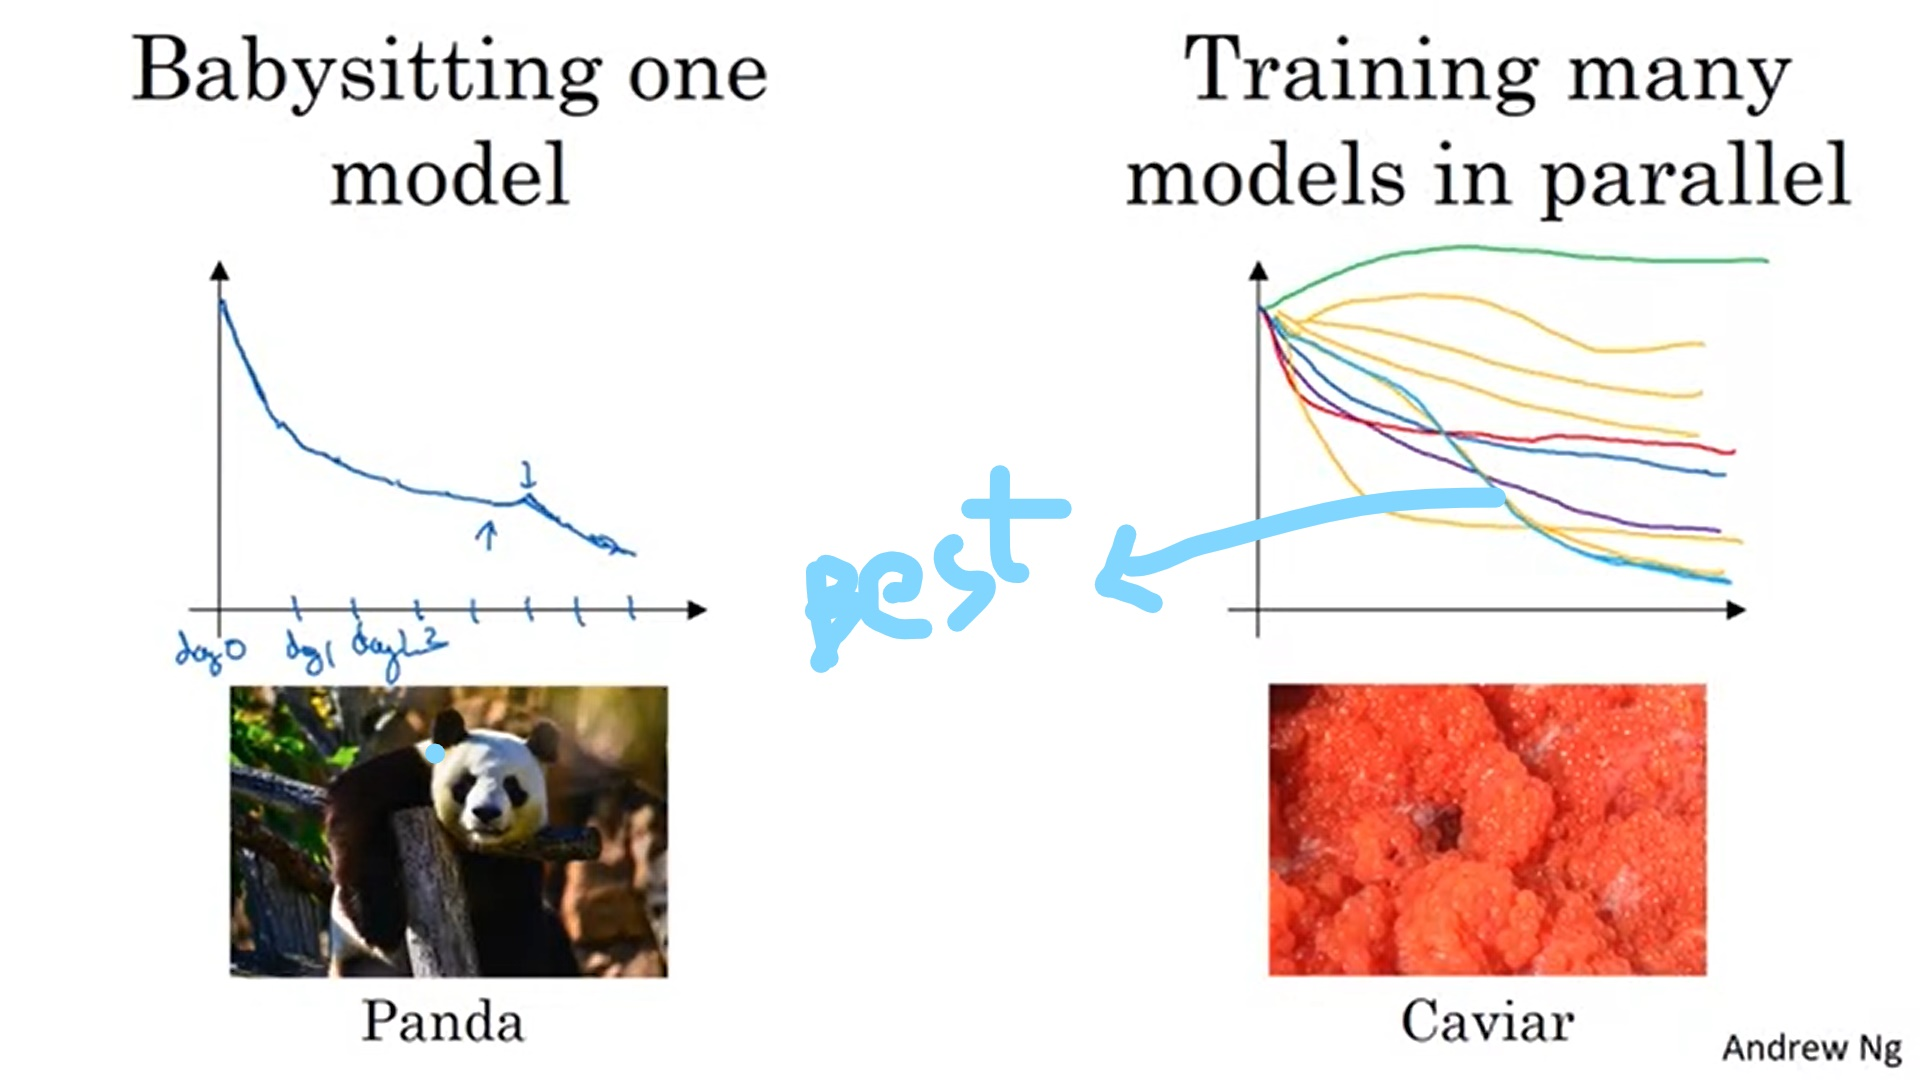

So you might have some setting of the hyperparameters and just let it run by itself ,either for a day or even for multiple days, and then you get some learning curve like that; and this could be a plot of the cost function J or cost of your training error or cost of your dataset error, but some metric in your tracking. And then at the same time you might start up a different model with a different setting of the hyperparameters. And so, your second model might generate a different learning curve, maybe one that looks like that. I will say that one looks better. And at the same time, you might train a third model, which might generate a learning curve that looks like that, and another one that, maybe this one diverges so it looks like that, and so on. Or you might train many different models in parallel, where these orange lines are different models, right, and so this way you can try a lot of different hyperparameter settings and then just maybe quickly at the end pick the one that works best.

So the way to choose between these two approaches is really a function of how much computational resources you have. If you have enough computers to train a lot of models in parallel,
Play video starting at :5:31 and follow transcript5:31
then by all means take the caviar approach and try a lot of different hyperparameters and see what works.